### Проведите декомпозицию ряда на составляющие для того, чтобы получить стационарный ряд. Сделайте проверку получившегося ряда тестом Дики — Фуллера

Продолжите решение:

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# загрузка данных и вывод первых пяти строк
df = pd.read_csv('D_QM_05_01_AirPassengers.csv', parse_dates=['Month'], index_col='Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


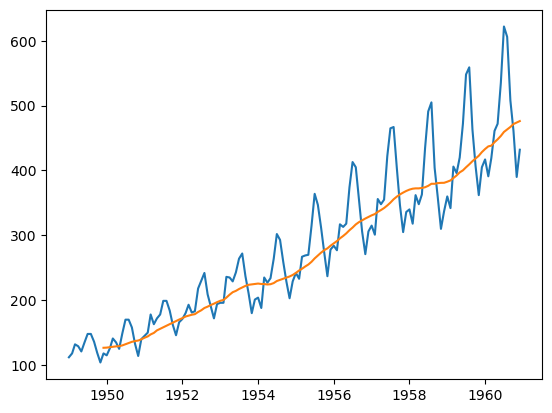

In [2]:
# построение графика по данным

rolmean = df.rolling(window=12).mean()
orig = plt.plot(df)
mean = plt.plot(rolmean)
plt.show()

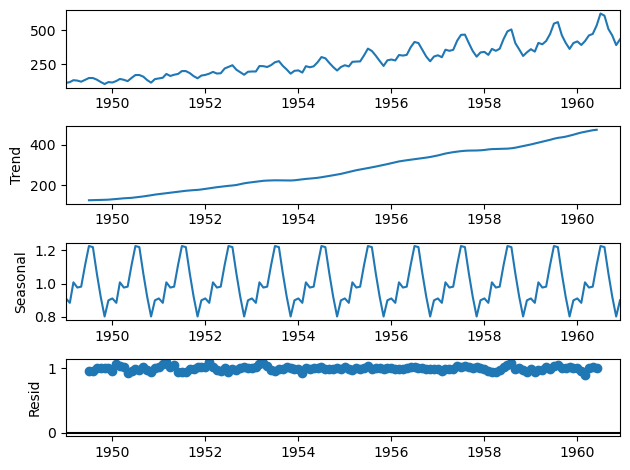

In [3]:
# проведение декомпозиции ряда
decomposition = seasonal_decompose(df, model='multiplicative')
fig = decomposition.plot()

<AxesSubplot:xlabel='Month'>

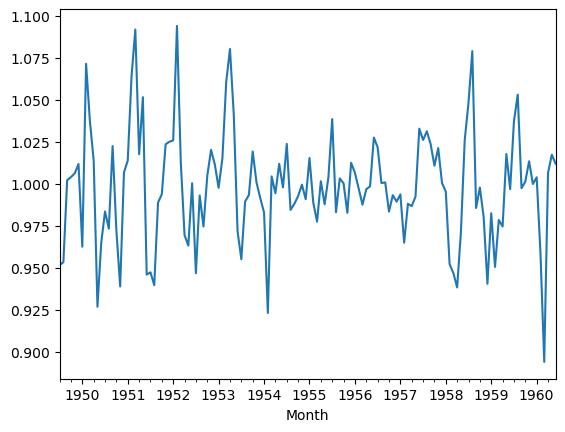

In [4]:
# получение стационарного ряда без тренда и сезонности
stationary_data = decomposition.resid.dropna()
stationary_data.plot()

In [5]:
# проверка стационарности ряда тестом Дики-Фуллера

result = adfuller(stationary_data)

print('ADF Statistic:', result[0])   
print('p-value:', result[1]) 
print('n_lags:', result[2]) 

for key, value in result[4].items():
    print(key, ':', value)

if result[0] < result[4]["5%"]:    
    print ("Временной ряд стационарен")
else:
    print ("Временной ряд не стационарен")

ADF Statistic: -7.415924640885227
p-value: 6.93602899259885e-11
n_lags: 7
1% : -3.484219653271961
5% : -2.885145235641637
10% : -2.579359138917794
Временной ряд стационарен


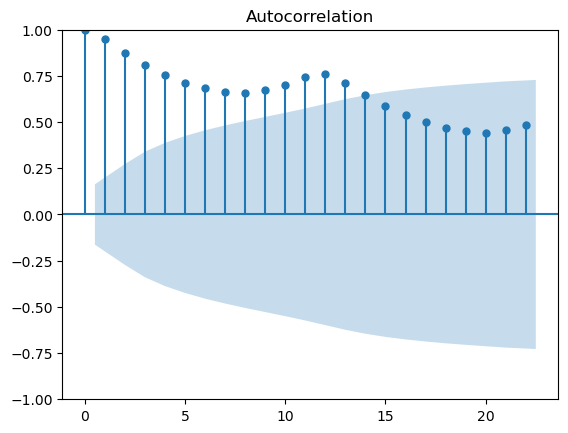

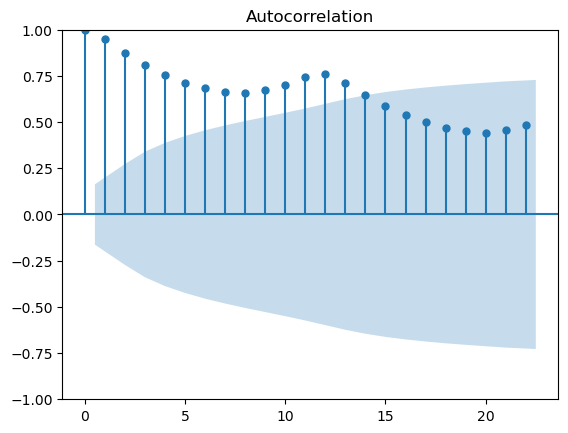

In [7]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(df)

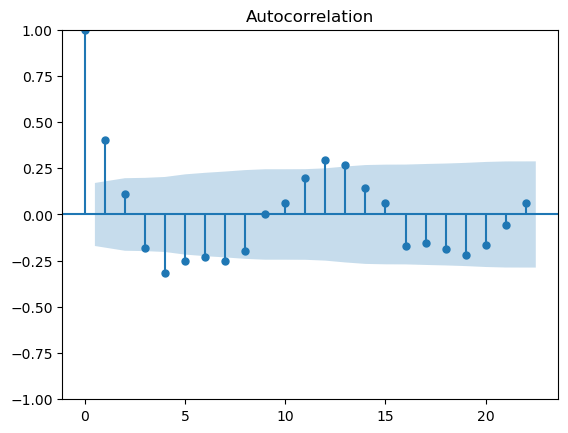

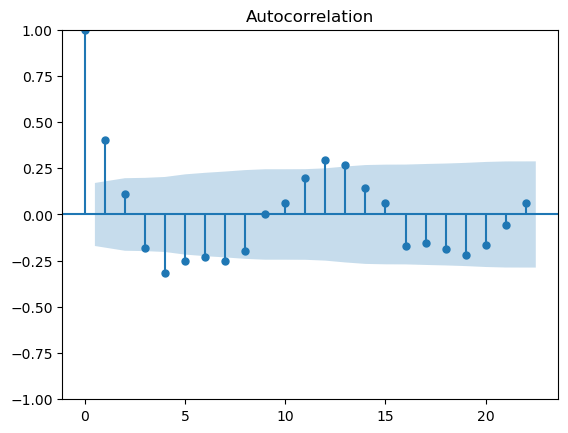

In [8]:
sm.graphics.tsa.plot_acf(stationary_data)

D:\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


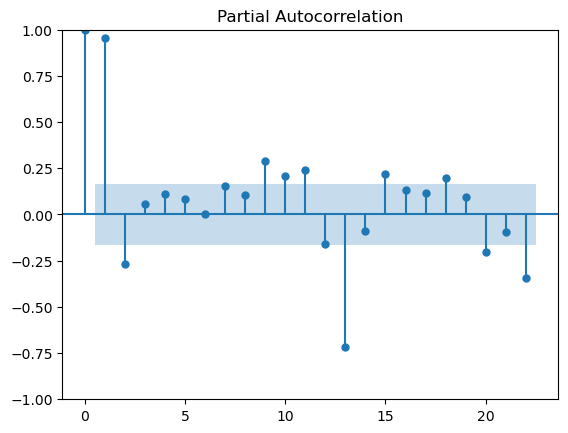

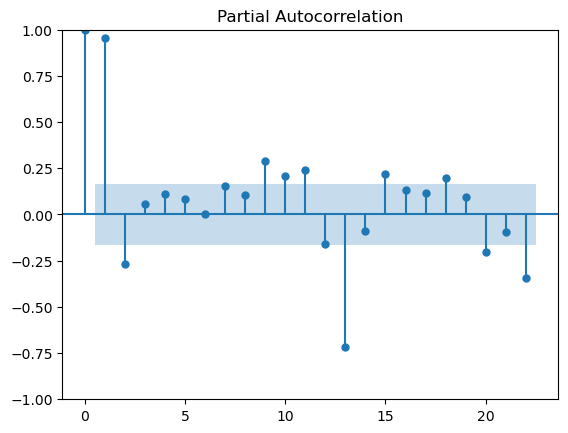

In [9]:
sm.graphics.tsa.plot_pacf(df)

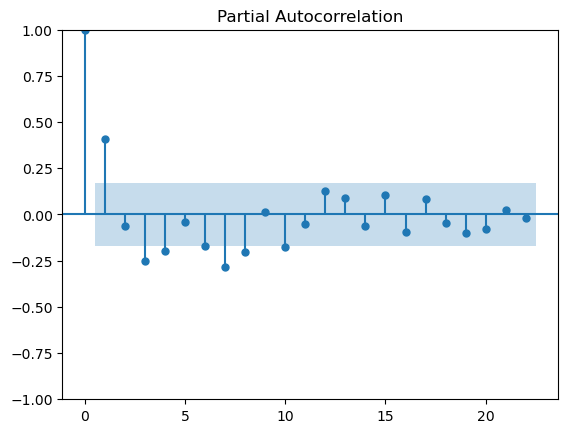

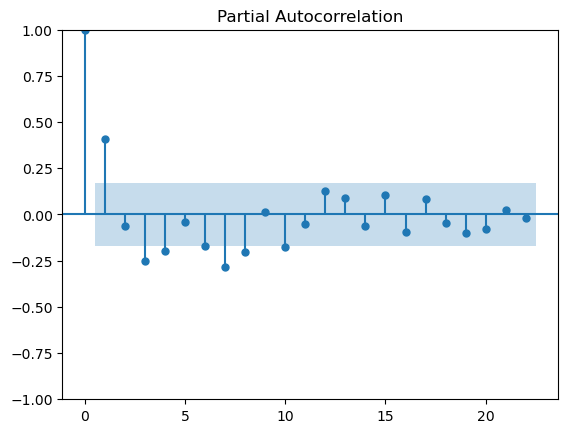

In [10]:
sm.graphics.tsa.plot_pacf(stationary_data)